In [1]:
# Import packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pandas_datareader.data import DataReader
import yfinance as yf
from pandas_datareader import data as pdr
from datetime import datetime
import os
import glob as glob

# Read in Raw Data

In [2]:
# This function reads the most recent dataset and cuts this based on the date range provided 

def cut_raw_data(start_date, end_date):
    
    # Set base path
    base_path = r'C:\Users\mball3\OneDrive - KPMG\Documents\Investment_Analysis\data'

    # This returns all folders in the base_path
    # return the folder, in the base path, if it is a folder
    # And only return folders of length 10 containins two underscores 
    folders = [folder for folder in os.listdir(base_path) if os.path.isdir(os.path.join(base_path, folder))
               and len(folder) == 10 and folder.count('_') == 2
              ]

    # Find latest folder in the path
    latest_folder = max(folders, key=lambda x: datetime.strptime(x,'%d_%m_%Y'))

    # Create new full path to the most recent folder
    latest_path = os.path.join(base_path, latest_folder)

    # Retrieve the file names
    filenames = glob.glob(latest_path+"/*.csv")

    # Combine data for all stocks
    all_data = []
    for filename in filenames:

        # Read in the historical data for each stock 
        historical_data = pd.read_csv(filename)
        Stock = filename.split("\\")[-1].split('.')[0]

        # Convert date to date format - english 
        historical_data['Stock'] = Stock
        historical_data['Date'] = pd.to_datetime(historical_data['Date'])

        historical_data.sort_values(by=['Date'], inplace=True)

        # Store the data
        all_data.append(historical_data)

    # Concatenate the data    
    df = pd.concat(all_data, ignore_index=True)

    # Convert date to date format 
    df['Date'] = pd.to_datetime(df['Date'])
    df.sort_values(by=['Date'], inplace=True)
    
    # Cut by dates
    df = df[(df['Date'] > start_date) & (df['Date'] < end_date) ]

    # Set the date as the index
    df = df.set_index('Date')

    # make certain columns numeric 
    cols_to_convert = ['Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume']
    df[cols_to_convert] = df[cols_to_convert].apply(pd.to_numeric, errors='coerce')

    # Confirm column names
    df.columns = ['Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume', 'Stock']
    
    return df


In [3]:
# This is the date range I had initally analysed
# It was just over a year's worth of data from the first data i began my analysis
df = cut_raw_data(start_date='1989-12-31', end_date='2024-01-15')
df

,Open,High,Low,Close,Adj Close,Volume,Stock
Date,,,,,,,
1990-01-02,0.605903,0.616319,0.598090,0.616319,0.382096,53035200,MSFT
1990-01-02,0.314732,0.334821,0.312500,0.332589,0.263414,183198400,AAPL
1990-01-02,0.000000,1.277778,1.194444,1.250000,1.083150,931050,LRCX
1990-01-02,0.000000,0.570313,0.546875,0.546875,0.537054,209600,EA
1990-01-03,0.621528,0.626736,0.614583,0.619792,0.384249,113774400,MSFT
...,...,...,...,...,...,...,...
2024-01-12,85.879997,86.449997,85.639999,86.379997,86.379997,5883900,GILD
2024-01-12,144.339996,144.740005,143.360001,144.240005,144.240005,13995200,GOOG
2024-01-12,760.729980,763.349976,754.859985,759.669983,759.669983,497200,LRCX


In [4]:
# Now convert the one large dataframe into seperate dfs for each stock
stocks = df['Stock'].unique()

for stock in stocks:
    globals()[f"{stock}"] = df[df['Stock'] == stock].drop('Stock',axis=1)


In [5]:
AAPL

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
1990-01-02,0.314732,0.334821,0.312500,0.332589,0.263414,183198400
1990-01-03,0.339286,0.339286,0.334821,0.334821,0.265181,207995200
1990-01-04,0.341518,0.345982,0.332589,0.335938,0.266066,221513600
1990-01-05,0.337054,0.341518,0.330357,0.337054,0.266950,123312000
1990-01-08,0.334821,0.339286,0.330357,0.339286,0.268718,101572800
...,...,...,...,...,...,...
2024-01-08,182.089996,185.600006,181.500000,185.559998,185.559998,59144500
2024-01-09,183.919998,185.149994,182.729996,185.139999,185.139999,42841800
2024-01-10,184.350006,186.399994,183.919998,186.190002,186.190002,46792900


In [6]:
# Inspect one stocks data 
AAPL.describe()

,Open,High,Low,Close,Adj Close,Volume
count,8574.000000,8574.000000,8574.000000,8574.000000,8574.000000,8.574000e+03
mean,25.529468,25.808005,25.261573,25.546925,24.608634,3.640528e+08
std,46.040452,46.547184,45.568534,46.082971,45.733197,3.596948e+08
min,0.114955,0.118304,0.113839,0.115513,0.097918,2.396800e+06
25%,0.377232,0.383929,0.368304,0.377232,0.314688,1.319556e+08
50%,3.047321,3.086607,3.016964,3.047857,2.583607,2.453882e+08
75%,27.026875,27.236874,26.759375,27.005625,24.568556,4.590096e+08
max,198.020004,199.619995,197.000000,198.110001,198.110001,7.421641e+09


Description of each variable:

Open - opening price that day

High - highest value that day

Low - lowest price that day

Close - close price that day

Adj Close - close price adjusted for splits and dividend distributions 

Volume - number of trades made that day


What is notable from the above description data
- the close price on average is marginally higher than the open price
- the close price also has a slightly smaller standard deviation, 
  meaning there is less veriance in the price of this stock at close
      - but the open price is just the previous days close price, so perhaps this is meaningless 
  
- the median < mean for volume, meaning there is a positive skew for the volume of trades
    - this means that the volume of transactions of AAPL are more often less than the mean number
    - there are more days of lower trade volume than the mean
    
- the variance of the high price is lower than of the low price, 
    - meaning the price fluctuations of spikes are slightly lower than of a dips


In [7]:
# Have a look at the info
AAPL.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 8574 entries, 1990-01-02 to 2024-01-12
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       8574 non-null   float64
 1   High       8574 non-null   float64
 2   Low        8574 non-null   float64
 3   Close      8574 non-null   float64
 4   Adj Close  8574 non-null   float64
 5   Volume     8574 non-null   int64  
dtypes: float64(5), int64(1)
memory usage: 468.9 KB


# 1. Data Visualisation 

<style>
    .my-custom-font {
        font-size: 16px;
    }
</style>

<span class="my-custom-font">
    
    
First I will visualise the closing price of stocks. 
    
The adjusted stock price is regarded as the best indicator of a stock's value

</span>


In [8]:
def line_plot(data, column, col_name, start_date, end_date):
    
    data = data[(data.index > start_date) & (data.index < end_date)]
    
    # Set Style 
    sns.set(style="whitegrid")

    # Create subplots
    plt.figure(figsize=(15, 10))
    plt.subplots_adjust(top=1.25, bottom=1.2)

    # Vis for each stock
    stocks = sorted(data['Stock'].unique())

    for i, stock in enumerate(stocks, 1):
        subset = data[data['Stock'] == stock]
        plt.subplot(6,2, i)
        sns.lineplot(x=subset.index, y=subset[column], data=subset)
        plt.title(f'{stock}', fontsize=10)
        plt.xlabel(None)
        plt.xticks(fontsize=10)
        plt.ylabel(col_name, fontsize=10)
        plt.yticks(fontsize=10)

    #plt.subplots_adjust(hspace=100)

    plt.tight_layout()
    plt.show()

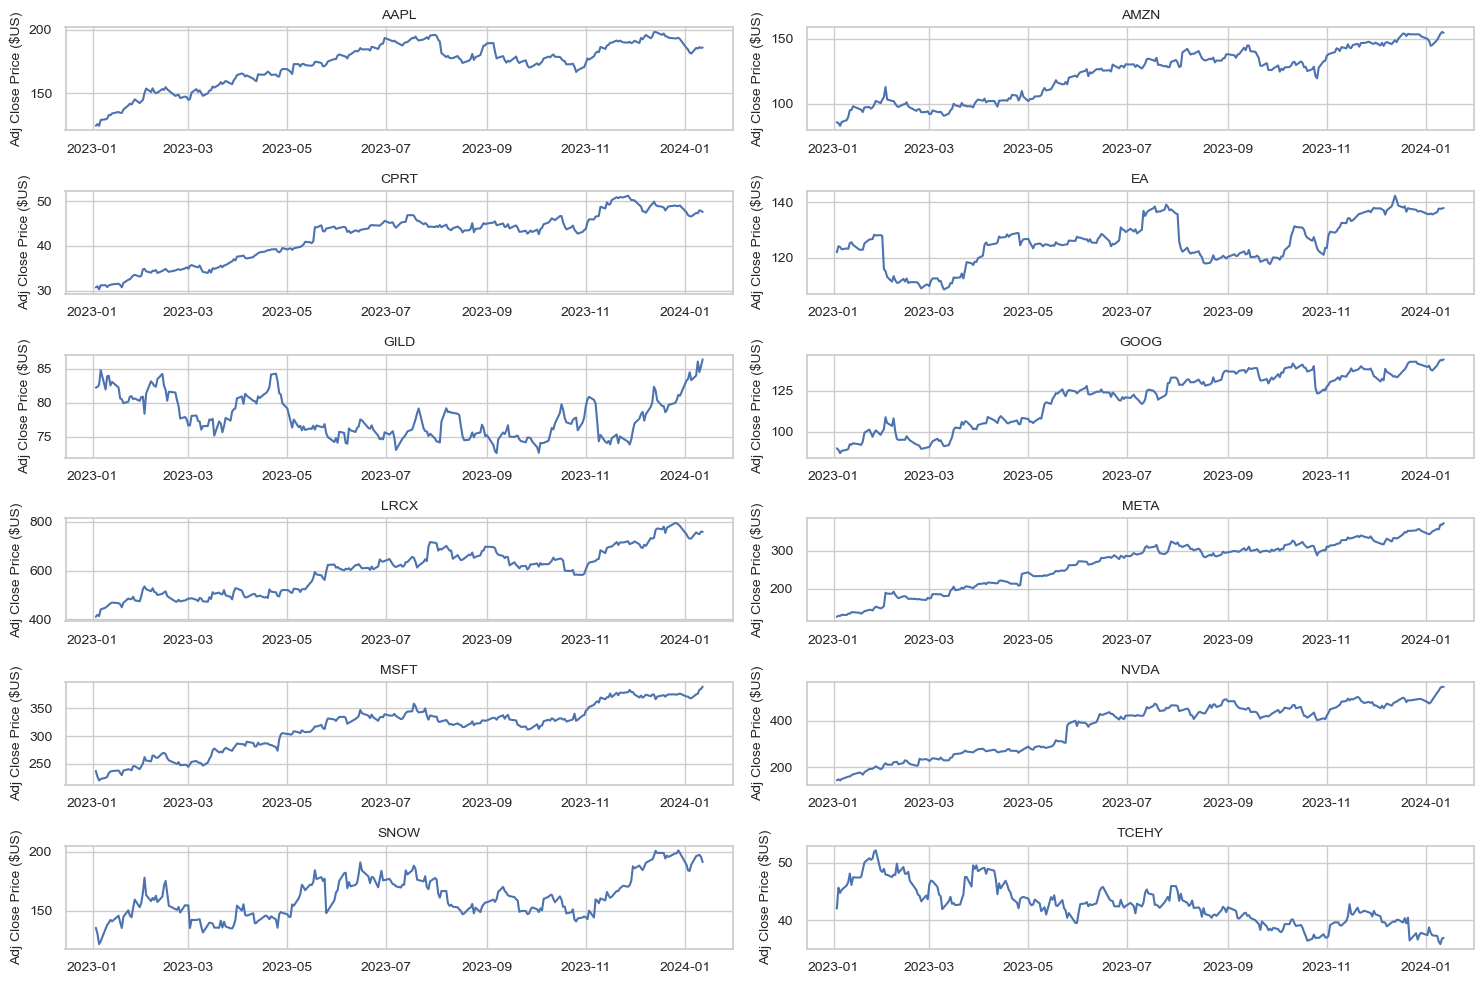

In [9]:
line_plot(df, 'Adj Close', 'Adj Close Price ($US)', start_date = '2022-12-31', end_date = '2024-01-15')

- TCEHY has had a fairy steady fall in value over the period
- META, LRCX, CPRT, AAPL & AMZN have shown increasing valuations 
- What I find most interesting, is the lack in volatility of META's price rise, this apprears to be steady growth
- Whereas SNOW for example shows high volatility - this may make predicing this stocks price changes more difficult
- But I anticipate that there could be overfitting when predicting META's stock price

Below I have visualised the volume of trades, that is the number of times this stock is traded on a daily basis

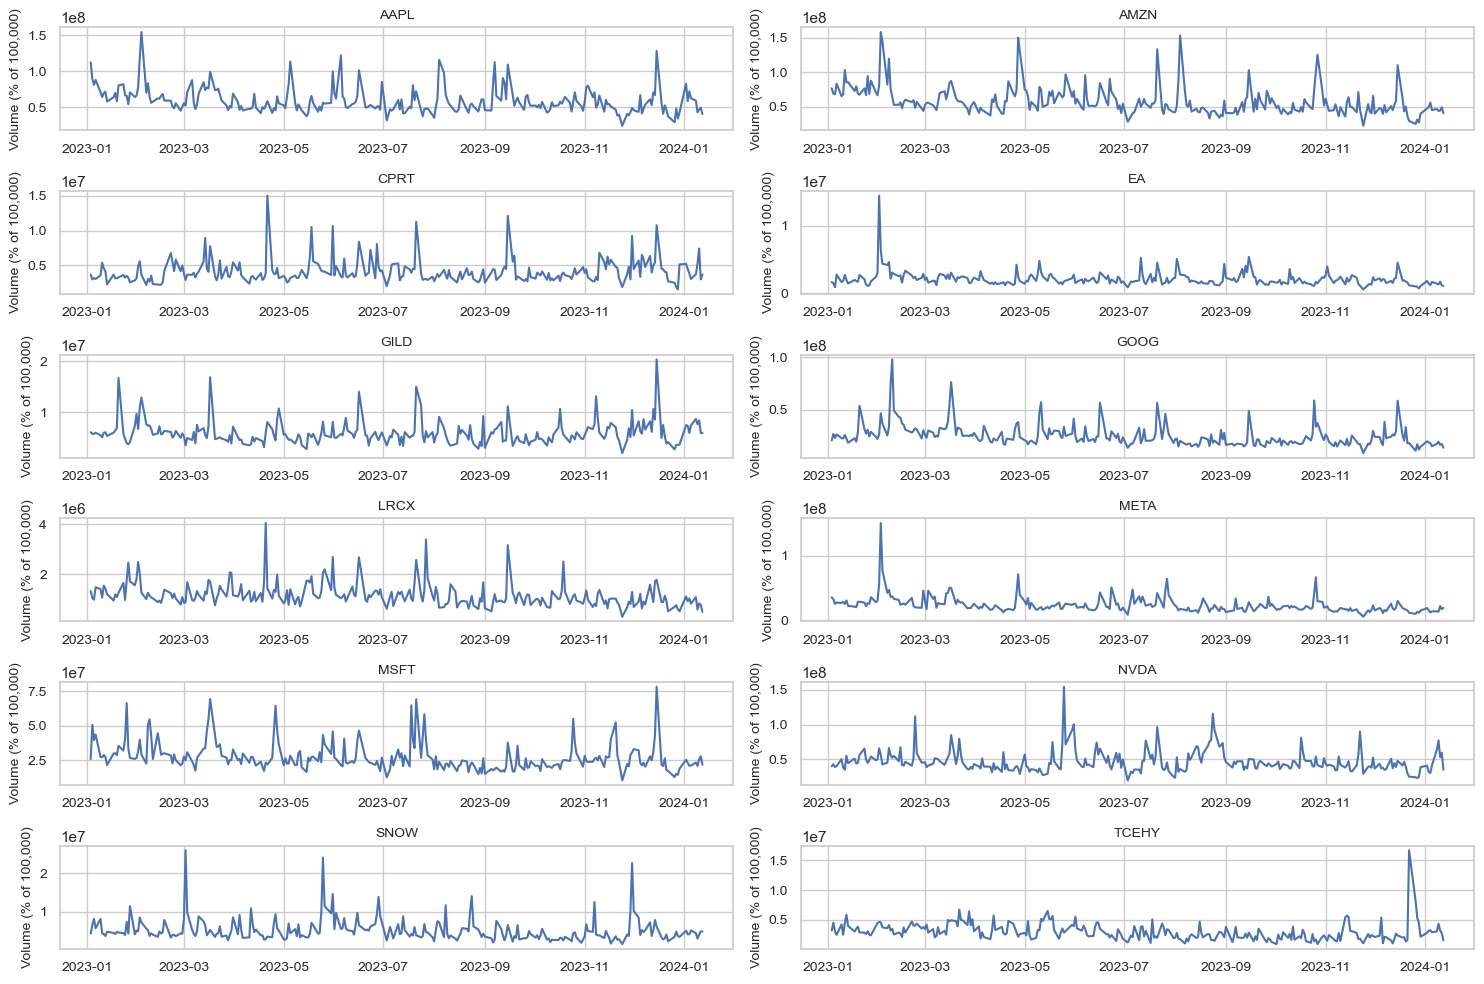

In [10]:
line_plot(df, 'Volume', 'Volume (% of 100,000)', start_date = '2022-12-31', end_date = '2024-01-15')

- AAPL and AMZN show the most obvious decline in volume of trades
- TCEHY has had an interesting spike around Q4 2023

# 3. Look at the Cost Basis - Profitability

I intend on making a profit from my analysis, therefore it will be worth visualising the daily profit from each stock

One way is to calculate the profit or loss on a daily basis.

I do this by calculating the cost basis, which measures the percentage change in the stock price from one day to the next

In [11]:
def create_daily_return(data):
    
    stocks = sorted(data['Stock'].unique())

    df_update = []

    for stock in stocks:
        temp = data[data['Stock']==stock]
        temp = temp.sort_index()
        temp['Daily Return'] = temp['Adj Close'].pct_change()
        df_update.append(temp)

    df2=pd.concat(df_update)

    cols_to_convert = ['Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume']

    df2[cols_to_convert] = df2[cols_to_convert].apply(pd.to_numeric, errors='coerce')
    
    return df2


In [12]:
df2 = create_daily_return(df)

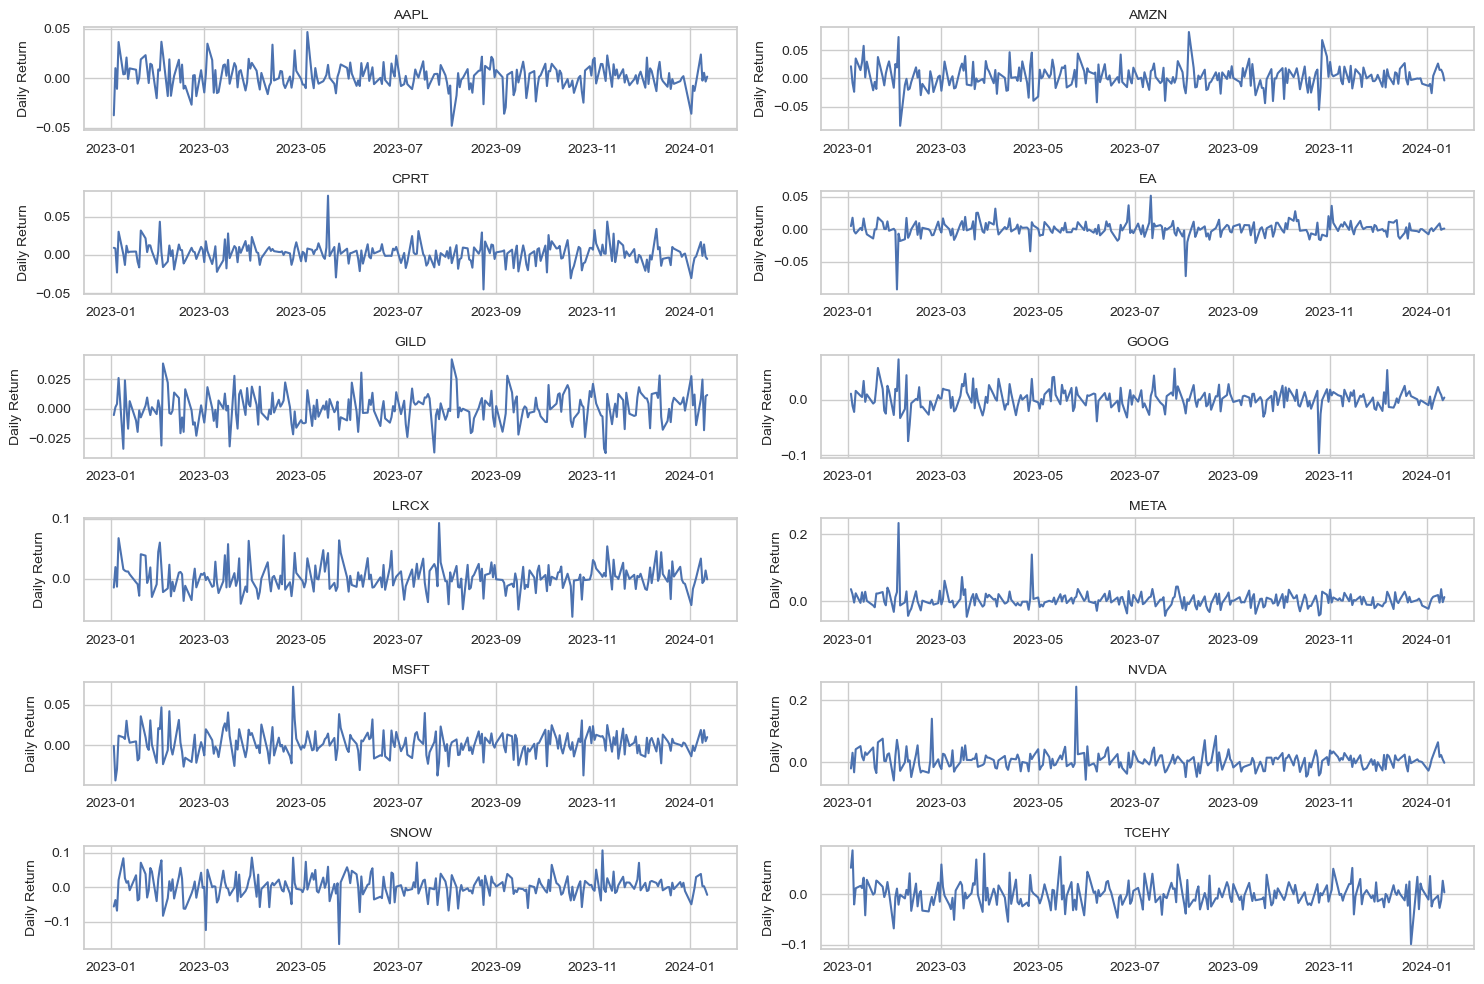

In [13]:
line_plot(df2, 'Daily Return', 'Daily Return', start_date = '2022-12-31', end_date = '2024-01-15')

- where values are greater than 0, the stock is making a profit for that day
- clearly profitability is extremely volatile, thus highlighting my theory that me being able to profit from this excercise is unlikely
- META shows a good example of where a shock has massively altered the price of a stock from one day to the next

Lets not look at the spread of profitability for each stock

In [14]:
def hisogram_plot(data, column, bins, start_date, end_date):
    
    data = data[(data.index > start_date) & (data.index < end_date)]
    
    # Set Style 
    sns.set(style="whitegrid")

    # Create subplots
    plt.figure(figsize=(15, 10))
    plt.subplots_adjust(top=1.25, bottom=1.2)

    # Vis for each stock
    stocks = sorted(data['Stock'].unique())

    for i, stock in enumerate(stocks, 1):
        subset = data[data['Stock'] == stock]
        subset = subset[~subset[column].isna()]
        plt.subplot(6,2, i)
        sns.histplot(data=subset, x=column, bins=bins)
        plt.title(f'{stock}', fontsize=10)
        plt.xlabel(column, fontsize=10)
        plt.xticks(fontsize=10)
        plt.ylabel('Count', fontsize=10)
        plt.yticks(fontsize=10)

    #plt.subplots_adjust(hspace=100)

    plt.tight_layout()
    plt.show()


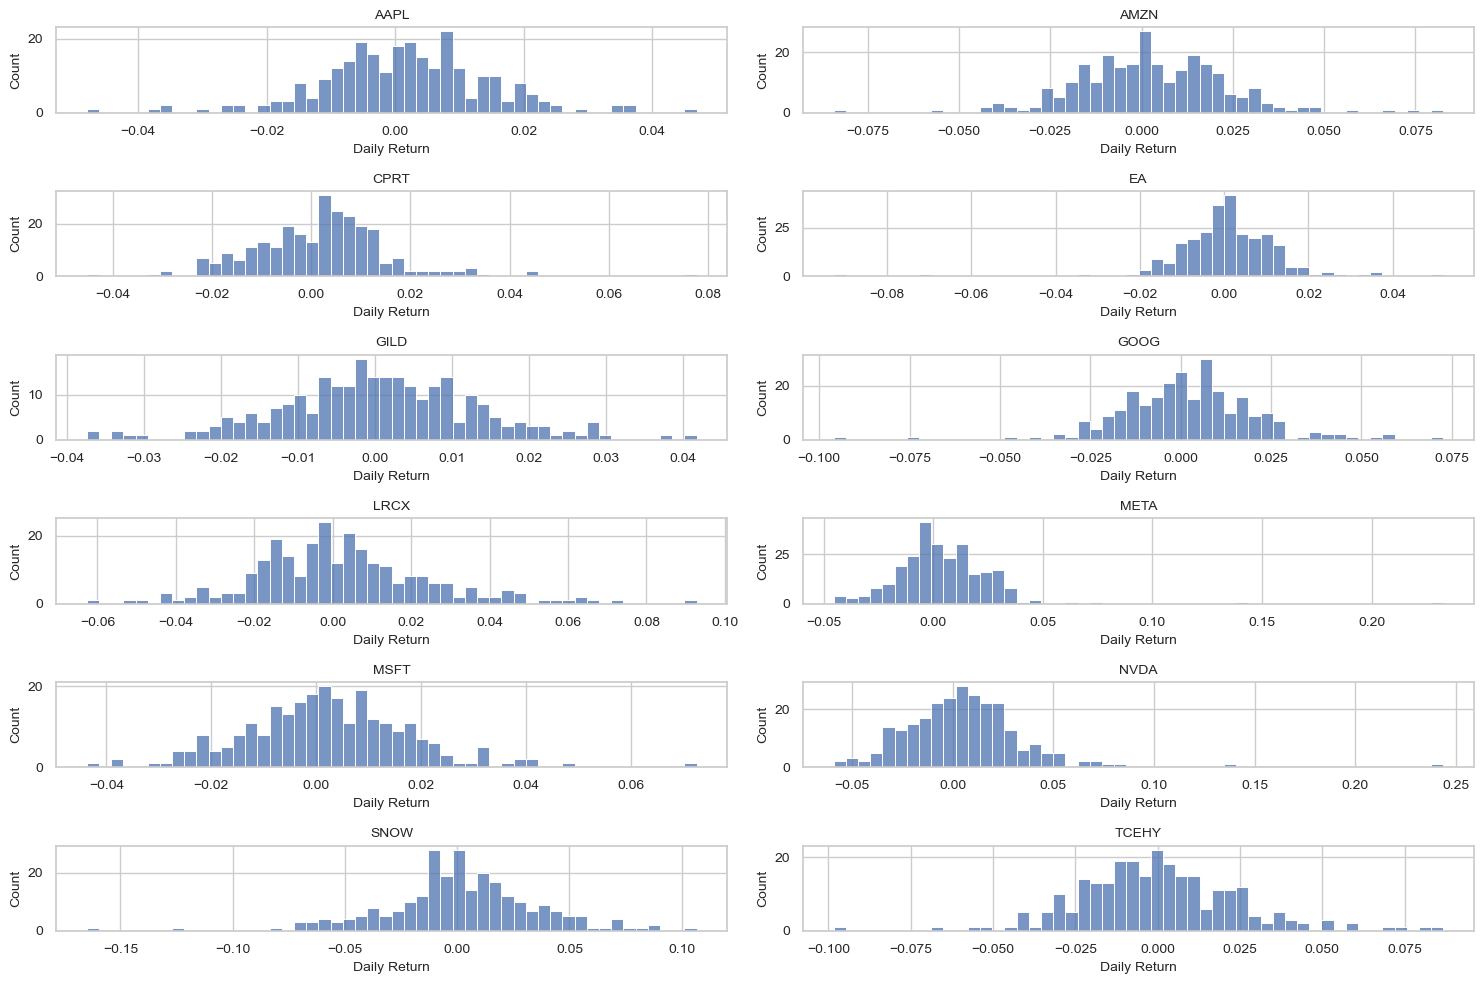

In [15]:
hisogram_plot(df2, 'Daily Return', 50, start_date = '2022-12-31', end_date = '2024-01-15')

- the spread of profitability for GILD is interesting, it has a very even distribution
- as does LRCX
- CPRT has very few days of high return 
- EA appears to have the lowest variance around the mean
- most stocks appear to have a fairly even spread, with a mean around zero
- this would suggest that it is likely to be difficult to make profit from trading these stocks as on average they will make no return from one day to the next

# 4. Moving Averages

- I want to better understand the trend of prices 
- To do this, I will create moving averages for each stock
- This smooths out the trends and may make it easier for me to see more general price changes for these stocks

In [16]:
# I ignore the warnings here, because they are just warning me that I am creating new columns on a copy of the original data
# I am aware of this
import warnings
warnings.filterwarnings('ignore')

# I will begin by working out the moving averages for the original data
ma = [10, 20, 30, 50, 200]
stocks = sorted(df2['Stock'].unique())

df_update = []

for stock in stocks:
    temp = df2[df2['Stock']==stock]
    for m in ma:
        temp[f'ac_ma_{m}'] = temp['Adj Close'].rolling(m).mean()
    df_update.append(temp)

# Join data together
df3 = pd.concat(df_update)

# Remove column names that are in rows, due to concatenation
cols_to_convert = ['Open', 'High', 'Low', 'Close', 'Adj Close', 
                   'Volume', 'Daily Return', 'ac_ma_10', 
                   'ac_ma_20', 'ac_ma_30', 'ac_ma_50', 'ac_ma_200']

df3[cols_to_convert] = df3[cols_to_convert].apply(pd.to_numeric, errors='coerce')

df3 = df3[['Stock', 'Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume', 
          'Daily Return', 'ac_ma_10', 
           'ac_ma_20', 'ac_ma_30', 'ac_ma_50', 'ac_ma_200']]
df3 = df3.sort_index()    


print(f"This should return True, :{len(df3) == len(df2) == len(df)}")


This should return True, :True


In [17]:
# Check for duplicates, this should be empty 
duplicate_rows = df3[df3.duplicated()]

duplicate_rows

,Stock,Open,High,Low,Close,Adj Close,Volume,Daily Return,ac_ma_10,ac_ma_20,ac_ma_30,ac_ma_50,ac_ma_200
Date,,,,,,,,,,,,,


In [18]:
# Now convert the one large dataframe into seperate dfs for each stock
stocks = sorted(df3['Stock'].unique())

for stock in stocks:
    globals()[f"{stock}"] = df3[df3['Stock'] == stock].drop('Stock',axis=1)

In [19]:
AAPL.tail(3)

,Open,High,Low,Close,Adj Close,Volume,Daily Return,ac_ma_10,ac_ma_20,ac_ma_30,ac_ma_50,ac_ma_200
Date,,,,,,,,,,,,
2024-01-10,184.350006,186.399994,183.919998,186.190002,186.190002,46792900,0.005671,186.912999,191.323501,191.525334,188.369413,180.076908
2024-01-11,186.539993,187.050003,183.619995,185.589996,185.589996,49128400,-0.003223,186.156999,190.867500,191.365000,188.679894,180.216655
2024-01-12,186.059998,186.740005,185.190002,185.919998,185.919998,40444700,0.001778,185.390999,190.265500,191.250001,188.987388,180.361190


(array([-20.,   0.,  20.,  40.,  60.,  80., 100.]),
 [Text(0, -20.0, '−20'),
  Text(0, 0.0, '0'),
  Text(0, 20.0, '20'),
  Text(0, 40.0, '40'),
  Text(0, 60.0, '60'),
  Text(0, 80.0, '80'),
  Text(0, 100.0, '100')])

<Figure size 2000x2000 with 0 Axes>

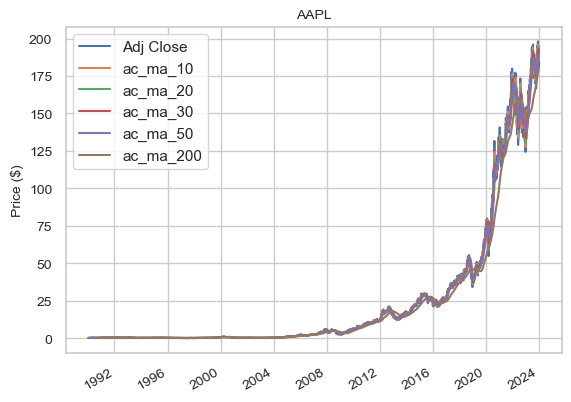

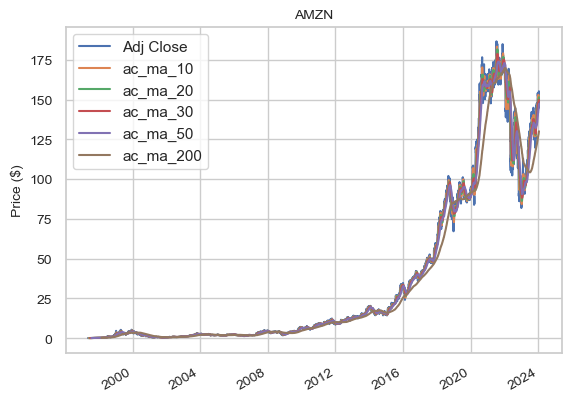

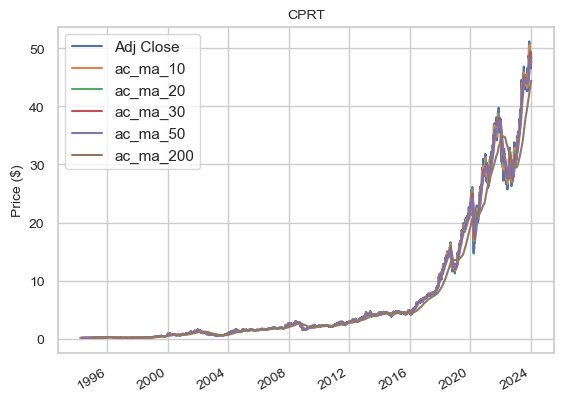

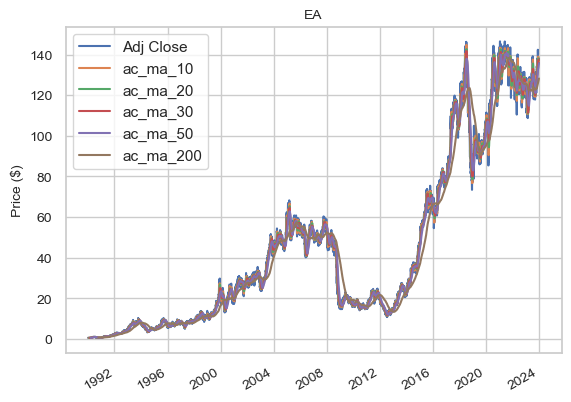

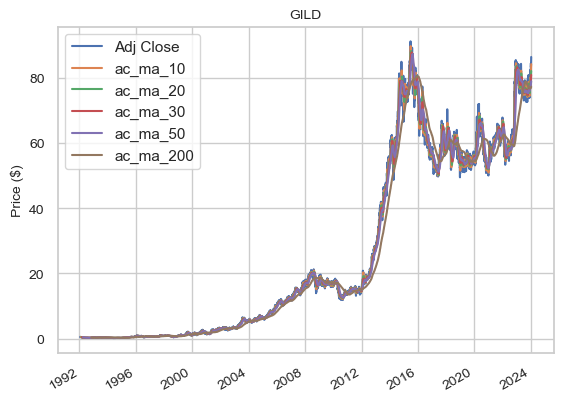

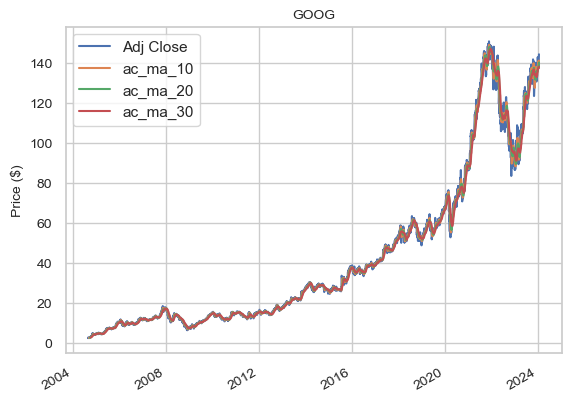

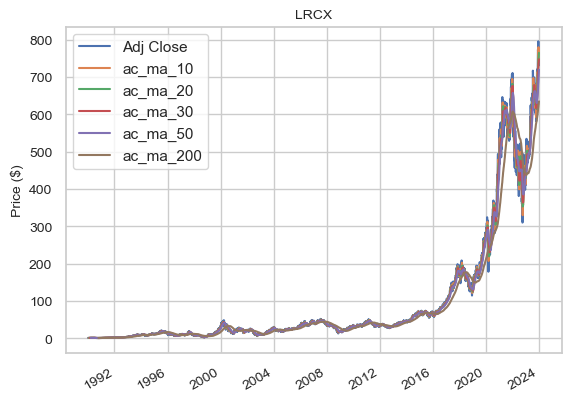

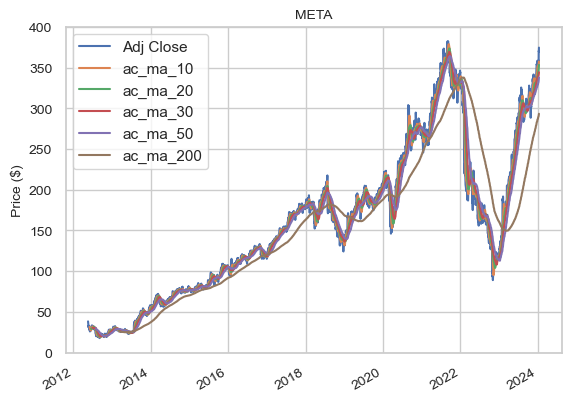

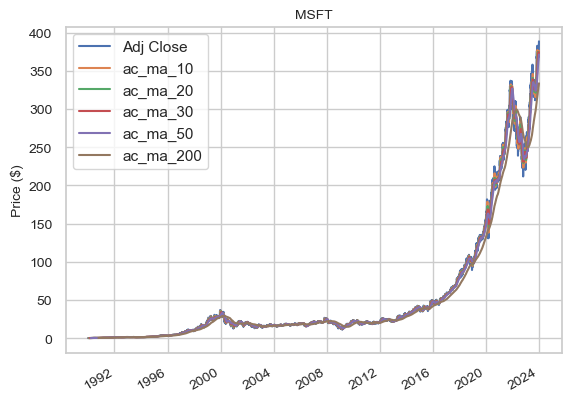

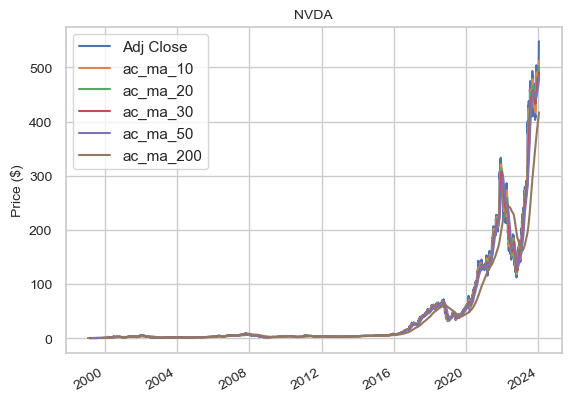

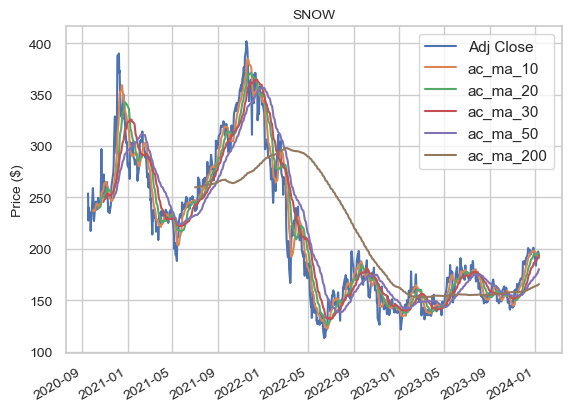

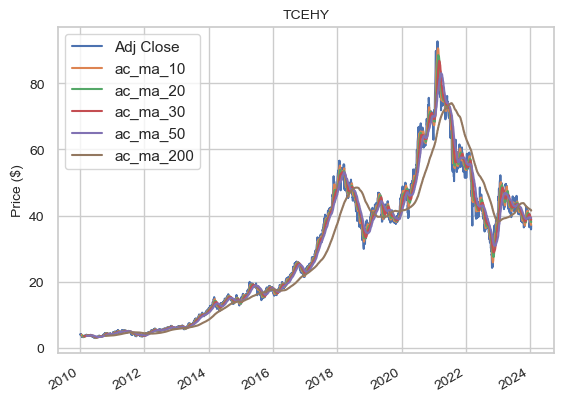

In [20]:
# I have not plotted them as subplots in order to make them easier to visualise

# Set Style 
sns.set(style="whitegrid")

# Create subplots
plt.figure(figsize=(20, 20))

AAPL[['Adj Close', 'ac_ma_10', 'ac_ma_20', 'ac_ma_30', 'ac_ma_50', 'ac_ma_200']].plot()
plt.title('AAPL', fontsize=10)
plt.xlabel(None)
plt.xticks(fontsize=10)
plt.ylabel('Price ($)', fontsize=10)
plt.yticks(fontsize=10)


AMZN[['Adj Close', 'ac_ma_10', 'ac_ma_20', 'ac_ma_30', 'ac_ma_50', 'ac_ma_200']].plot()
plt.title('AMZN', fontsize=10)
plt.xlabel(None)
plt.xticks(fontsize=10)
plt.ylabel('Price ($)', fontsize=10)
plt.yticks(fontsize=10)

CPRT[['Adj Close', 'ac_ma_10', 'ac_ma_20', 'ac_ma_30', 'ac_ma_50', 'ac_ma_200']].plot()
plt.title('CPRT', fontsize=10)
plt.xlabel(None)
plt.xticks(fontsize=10)
plt.ylabel('Price ($)', fontsize=10)
plt.yticks(fontsize=10)

EA[['Adj Close', 'ac_ma_10', 'ac_ma_20', 'ac_ma_30', 'ac_ma_50', 'ac_ma_200']].plot()
plt.title('EA', fontsize=10)
plt.xlabel(None)
plt.xticks(fontsize=10)
plt.ylabel('Price ($)', fontsize=10)
plt.yticks(fontsize=10)

GILD[['Adj Close', 'ac_ma_10', 'ac_ma_20', 'ac_ma_30', 'ac_ma_50', 'ac_ma_200']].plot()
plt.title('GILD', fontsize=10)
plt.xlabel(None)
plt.xticks(fontsize=10)
plt.ylabel('Price ($)', fontsize=10)
plt.yticks(fontsize=10)

GOOG[['Adj Close', 'ac_ma_10', 'ac_ma_20', 'ac_ma_30']].plot()
plt.title('GOOG', fontsize=10)
plt.xlabel(None)
plt.xticks(fontsize=10)
plt.ylabel('Price ($)', fontsize=10)
plt.yticks(fontsize=10)

LRCX[['Adj Close', 'ac_ma_10', 'ac_ma_20', 'ac_ma_30', 'ac_ma_50', 'ac_ma_200']].plot()
plt.title('LRCX', fontsize=10)
plt.xlabel(None)
plt.xticks(fontsize=10)
plt.ylabel('Price ($)', fontsize=10)
plt.yticks(fontsize=10)

META[['Adj Close', 'ac_ma_10', 'ac_ma_20', 'ac_ma_30', 'ac_ma_50', 'ac_ma_200']].plot()
plt.title('META', fontsize=10)
plt.xlabel(None)
plt.xticks(fontsize=10)
plt.ylabel('Price ($)', fontsize=10)
plt.yticks(fontsize=10)

MSFT[['Adj Close', 'ac_ma_10', 'ac_ma_20', 'ac_ma_30', 'ac_ma_50', 'ac_ma_200']].plot()
plt.title('MSFT', fontsize=10)
plt.xlabel(None)
plt.xticks(fontsize=10)
plt.ylabel('Price ($)', fontsize=10)
plt.yticks(fontsize=10)

NVDA[['Adj Close', 'ac_ma_10', 'ac_ma_20', 'ac_ma_30', 'ac_ma_50', 'ac_ma_200']].plot()
plt.title('NVDA', fontsize=10)
plt.xlabel(None)
plt.xticks(fontsize=10)
plt.ylabel('Price ($)', fontsize=10)
plt.yticks(fontsize=10)

SNOW[['Adj Close', 'ac_ma_10', 'ac_ma_20', 'ac_ma_30', 'ac_ma_50', 'ac_ma_200']].plot()
plt.title('SNOW', fontsize=10)
plt.xlabel(None)
plt.xticks(fontsize=10)
plt.ylabel('Price ($)', fontsize=10)
plt.yticks(fontsize=10)

TCEHY[['Adj Close', 'ac_ma_10', 'ac_ma_20', 'ac_ma_30', 'ac_ma_50', 'ac_ma_200']].plot()
plt.title('TCEHY', fontsize=10)
plt.xlabel(None)
plt.xticks(fontsize=10)
plt.ylabel('Price ($)', fontsize=10)
plt.yticks(fontsize=10)

- The moving averages are a useful way to understand the trend of each stock
- The most common trend for these stock prices is that over time the are increasing, with the exception of SNOW
- I therefore anticipate that my model will predict stock prices to rise
- Given the stock prices are increasing at an increasing rate, I need to make sure I cut my training data to a recent period
- Failure to do so will mean any model will just predict prices to rise

# 5. Correlations

- I will now look at the correlations between the stock's daily returns 
- This is to understand whether stocks in the same industry behave in a similar fashion 
- If we see that this is the case, I may be able to use price changes to one stock as indicators for future price changes in another stock


In [21]:
def correlation_plots(column_name, start_date, end_date):
    
    # TAKE THE FAILY RETURN FROM INDIVINDUAL DATAFRAMES
    # COMBINE INTO ONE DATASET
    stocks = sorted(df3['Stock'].unique())
    stocks_df = [AAPL, AMZN, CPRT, EA, GILD, GOOG, LRCX, META, MSFT, NVDA, SNOW, TCEHY]

    data_store = pd.DataFrame()
    for stock, s_df in zip(stocks, stocks_df):
        temp_store = pd.Series(s_df[column_name], name=f'{stock}')
        data_store = pd.concat([data_store, temp_store], axis=1)

    # Make a copy  
    df = data_store
    df.reset_index(inplace=True)
    df['index'] = pd.to_datetime(df['index'])
    df = df.set_index(df['index'])
    df.drop(columns=['index'], inplace=True)
    
    df = df[(df.index > start_date) & (df.index < end_date)]
    
    # PLOT A CORRELATION HEATMAP
    correlation_matrix = df.corr()

    # Create a heatmap
    plt.figure(figsize=(6, 6))
    sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5, annot_kws={"size": 8})
    plt.title(f'{column_name} Correlation Matrix Heatmap')
    plt.show()
    
    # CREATE PAIRPLOT
    big_5_dr = df[['AAPL', 'AMZN', 'GOOG', 'META','MSFT']]
    
    daily_return = sns.pairplot(big_5_dr)
    daily_return.map_lower(sns.kdeplot, levels=4, color=".2")
    plt.suptitle(f"Pairplot of {column_name}", y=1.02)
    
    return df


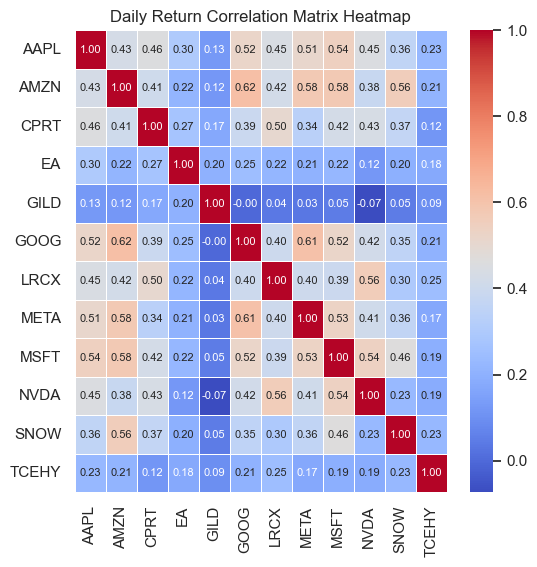

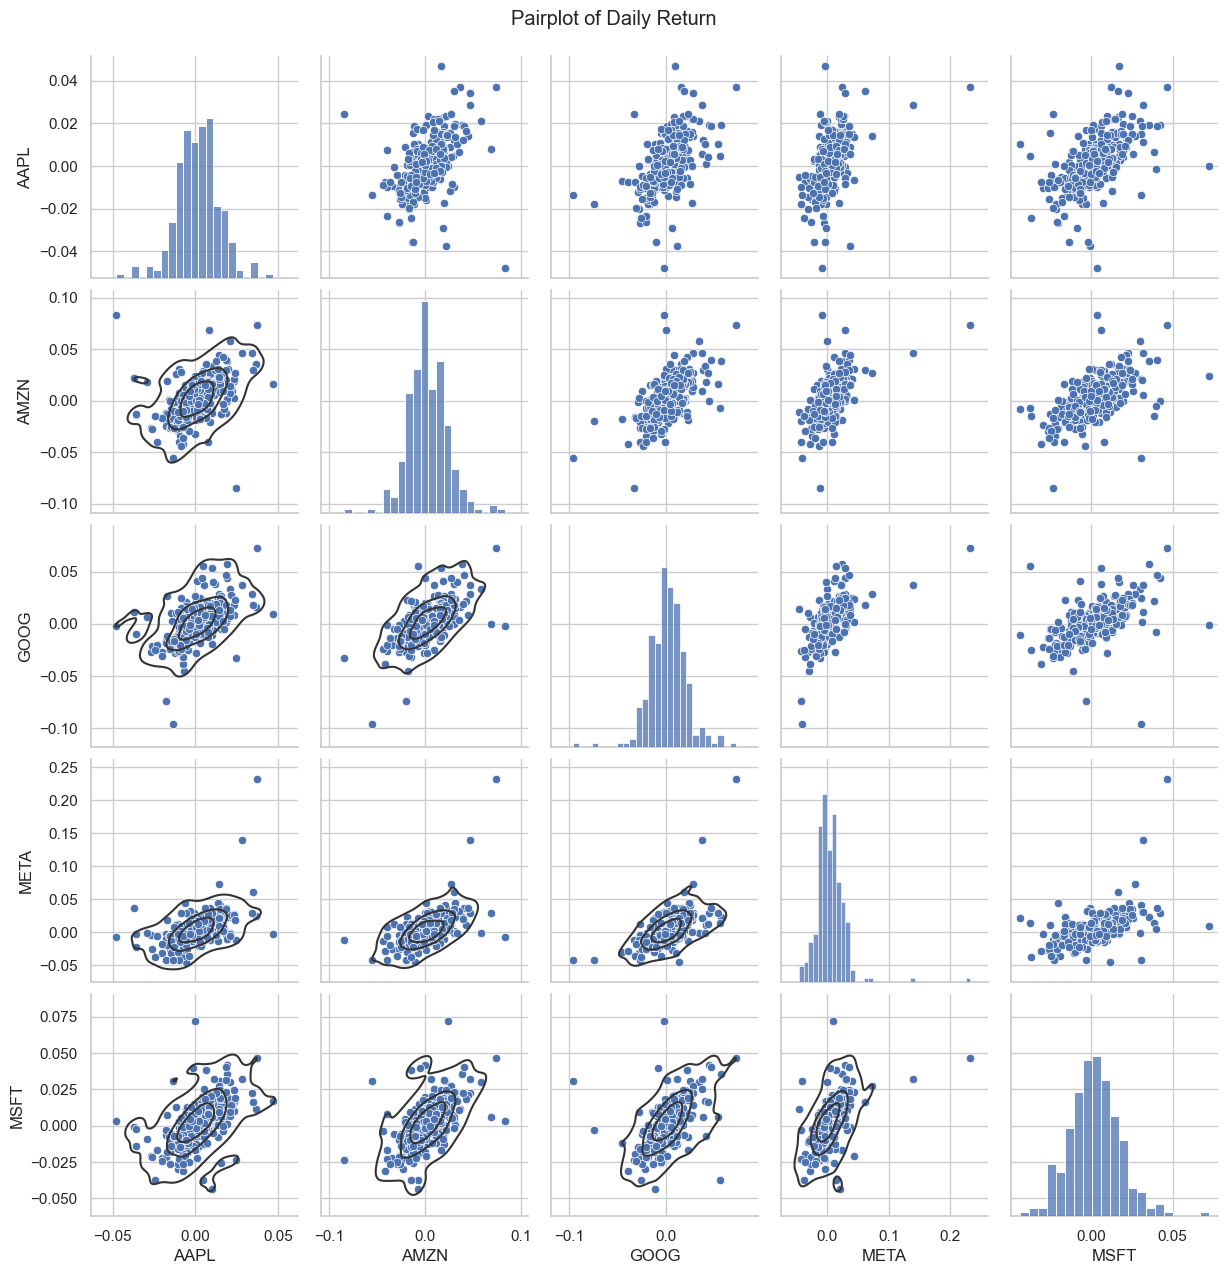

In [22]:
dr_df = correlation_plots('Daily Return', start_date = '2022-12-31', end_date = '2024-01-15')

As of 15/01/2024:
- the strongest correlation is between GOOG & AMZN - two massive tech companies, so this makes logical sense
- then GOOG & META 
- then META & AZN and MSFT & AMZN
- my assumption is that because these 5 massive tech companies are so much larger than the rest of the stocks I am looking at, they are most similar to eachother 
    - and so shocks to the market affect them in similar ways
    - or perhaps a fall in the value of one of these stocks, may impact the value of the others
    
    
I then investigate the correlations between the top 5 tech companies in more detail:
- we already know from the heatmap that the correlations between the big 5 tech companies are all positive
- we also know which are strongest
- but this is a useful way of visualising the relationships


- the Kernel density plot has been useful for showing the three most dense areas in this distribution


I'm going to repeat this process for the adjusted closing price too

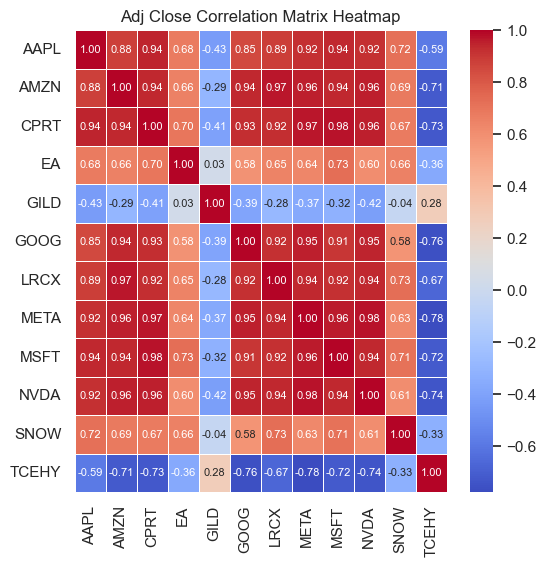

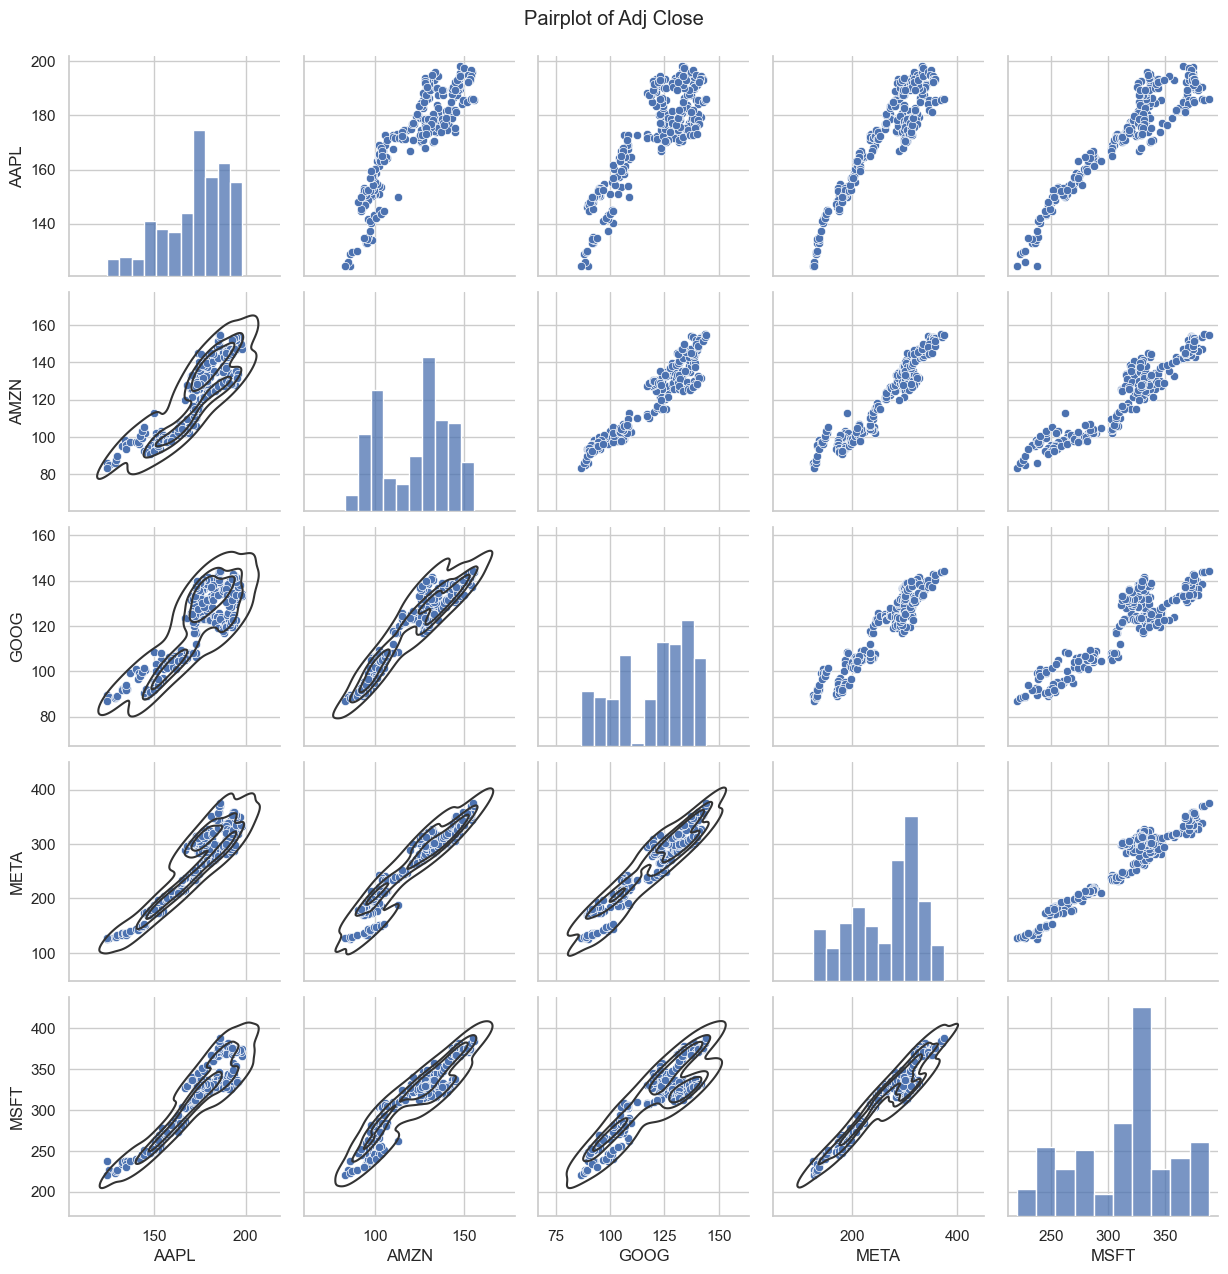

In [23]:
ac_df = correlation_plots('Adj Close', start_date = '2022-12-31', end_date = '2024-01-15')

- From this we can see that the correlations between the adjusted closing prices of these stocks are far stronger than they are for the daily return 
- this suggests that closing price changes for the big 5 tech companies are much more aligned than the daily returns are
- the daily returns are likely to be less well correlated because they refer to a percentage change from one point to another, which involves two prices, instead of just one

- analysing the correlations between these companies has beenn useful in my understanding of these companies
- though it isn't influencing how I will conduct my analyis at this point

# 6. Risk vs. Reward

I've seen an example online where someone used the mean and standard deviation of a stock price  to represent the reward and risk of each stock
- I believe that the mean of the daily return is used to represent the expected return from a stock
    - it is the average % profit earnt on a stock 
    
- The standard deviation was used as a measure of risk
    - this is because the standard deviation measures the variability of a stock
    - a large standard deviation means there is lots of variance about the mean of a stocks daily return 

In [24]:
# Find the mean and standard deviation for each stock
col_df = []
mean_df = []
std_df = []
for col in dr_df.columns:
    mean = dr_df[col].mean()
    std = dr_df[col].std()
    
    col_df.append(col)
    mean_df.append(mean)
    std_df.append(std)
    
er_risk = {'stock':col_df, 'mean':mean_df, 'std':std_df}
er_risk = pd.DataFrame(er_risk)
er_risk

,stock,mean,std
0,AAPL,0.001489,0.012910
1,AMZN,0.002570,0.020643
2,CPRT,0.001816,0.013610
3,EA,0.000574,0.012722
4,GILD,0.000253,0.012879
5,GOOG,0.002059,0.019035
6,LRCX,0.002583,0.022439
7,META,0.004684,0.024858
8,MSFT,0.002019,0.015637
9,NVDA,0.005550,0.030335


Text(0, 0.5, 'Risk')

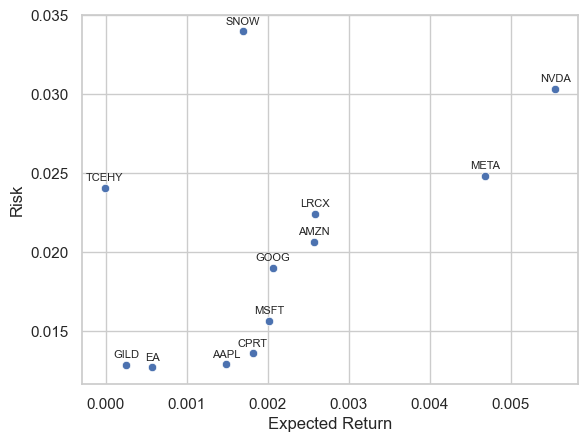

In [25]:
# plot the expected return against the risk of each stock
sns.scatterplot(data=er_risk, x='mean', y='std')

for index, row in er_risk.iterrows():
    plt.annotate(row['stock'], 
                 (row['mean'], row['std']), 
                 textcoords="offset points", 
                 xytext=(0, 5), 
                 ha='center',
                 fontsize=8)
    
plt.xlabel('Expected Return')
plt.ylabel('Risk')

- unbelieveably the expected return from each stock is positive, meaning that on average the price of each stock is higher than the day before on average
- based on this, we should place money on every stock and will make profit on average



- given that the expected return from this period is highest for NVDA, I am going to try and predict it's stock price going forward
- this is the next step of my analysis

# 7. LSTM Modelling

- I have seen that the LSTM model is a really useful model for timeseries forecasting 
- I am going to test this model first and may try some different types too
- My analysis for far has informed me that I will be predicting the price of the NVDA stock
- I will be predicting the Close price, not the Adjusted price, as I cannot account for tax/dividends fees etc
- My analysis so far has also taught me that stock prices have risen sharpl in recent years
- I therefore need to cuy my data so as not to train my model on old trends, which may introduce BIAS into my model

*Getting the raw data*

In [26]:
df = cut_raw_data(start_date='2022-12-31', end_date='2024-01-15')

stocks = df['Stock'].unique()

for stock in stocks:
    globals()[f"{stock}"] = df[df['Stock'] == stock].drop('Stock',axis=1)

    
NVDA.tail(3)

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2024-01-10,536.159973,546.000000,534.890015,543.500000,543.500000,53379600
2024-01-11,549.989990,553.460022,535.599976,548.219971,548.219971,59675900
2024-01-12,546.200012,549.700012,543.299988,547.099976,547.099976,35247900


In [27]:
# This function looks at the close price on a given date
# If the window is say 3
# It then finds the close price three days prior to this date
# So Target-1 is yesterdays close price
# This turns this into a supervised learning problem, where Target is the target variable
# And the other n variables are the input data
# This is to get the dataset required for the LSTM model

def create_window_df(data, window):
    # Create temp data between date range specified
    temp = data.loc[data.index[0]:data.index[-1]]
    
    df_window = []
    
    for i in range(len(temp)):
        row = temp[i-window:i+1]
        
        if len(row) != (window+1):
            continue
            
        else:
            date = row.index[-1]
            column_names = [f'Target-{j}' for j in range(window, 0, -1)]
            column_names.append('Target')
            
            df_dict = dict(zip(column_names, row))
            df_dict.update({'Date':date})
            
            df_window.append(df_dict)
    
    df_window = pd.DataFrame(df_window)
    df_window = df_window.set_index('Date')
    
    return df_window

In [28]:
data_set = NVDA
df_windowed = create_window_df(data_set['Close'], window=3)
df_windowed

,Target-3,Target-2,Target-1,Target
Date,,,,
2023-01-06,143.149994,147.490005,142.649994,148.589996
2023-01-09,147.490005,142.649994,148.589996,156.279999
2023-01-10,142.649994,148.589996,156.279999,159.089996
2023-01-11,148.589996,156.279999,159.089996,160.009995
2023-01-12,156.279999,159.089996,160.009995,165.110001
...,...,...,...,...
2024-01-08,475.690002,479.980011,490.970001,522.530029
2024-01-09,479.980011,490.970001,522.530029,531.400024
2024-01-10,490.970001,522.530029,531.400024,543.500000


In [29]:
# Turn this data into a numpy dataset, for the model

def windowed_to_numpy(data):
    
    data = data.reset_index()
    data_as_np = data.to_numpy()
    
    # Get just the dates
    dates = data_as_np[:, 0]

    # Find the x data, then need to get the data in one entry 
    # This seems to be the desired shape for the model
    middle_matrix = data_as_np[:, 1:4]
    X = middle_matrix.reshape((len(dates), middle_matrix.shape[1], 1))

    # Get the target data
    Y = data_as_np[:, 4]
    
    return dates, X.astype(np.float32), Y.astype(np.float32)


In [30]:
dates, X, Y = windowed_to_numpy(df_windowed)

dates.shape, X.shape, Y.shape

((256,), (256, 3, 1), (256,))

*Train, Validation, Test split*

- I want to create a training, evaluation and a test dataset
- so rather than creating that with the train_test_split function, im going to create it manually

Text(0, 0.5, 'Close Price ($)')

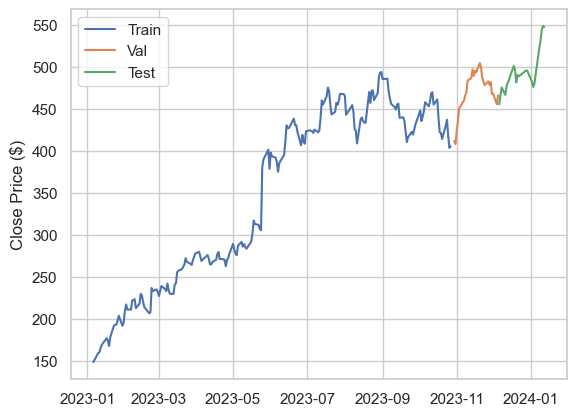

In [31]:
q_80 = int(len(dates) *.8)
q_90 = int(len(dates) *.9)

#Train
dates_train, X_train, Y_train = dates[:q_80], X[:q_80], Y[:q_80]

#Eval
dates_val, X_val, Y_val = dates[q_80:q_90], X[q_80:q_90], Y[q_80:q_90]

#Test
dates_test, X_test, Y_test = dates[q_90:], X[q_90:], Y[q_90:]

# Plot
plt.plot(dates_train, Y_train)
plt.plot(dates_val, Y_val)
plt.plot(dates_test, Y_test)
plt.legend(['Train', 'Val', 'Test'])
plt.ylabel('Close Price ($)')

*Building the model*

In [32]:
from tensorflow.keras.models import Sequential # model
from tensorflow.keras.optimizers import Adam #optimiser
from tensorflow.keras import layers # model will have multiple layers

# Build

model = Sequential([layers.Input((3,1)), # there are three layers to out input data, because the window has three layers
                   layers.LSTM(64), # number of nuerons in the neural network - this is a good level to prevent overfitting 
                   layers.Dense(32, activation='relu'), # this creates another layer in the NN
                   layers.Dense(32, activation='relu'), # do another
                   layers.Dense(1) # final layer
                   ])

model.compile(loss='mse', # loss means we are trying to minimise the mean squared error
              optimizer=Adam(learning_rate=0.001), # try this learning rate
              metrics = ['mean_absolute_error'] # this allows us to see on average how off the model is
                                                # it makes more sense to interpret this, even if minimising the mean squared error
             )


model.fit(X_train, Y_train, validation_data=(X_val, Y_val), epochs=100 ) # runs for 100 times on the training data



Epoch 1/100


7/7 [==============================] - 5s 148ms/step - loss: 129765.9219 - mean_absolute_error: 345.4907 - val_loss: 219689.8125 - val_mean_absolute_error: 468.0141
Epoch 2/100
7/7 [==============================] - 0s 12ms/step - loss: 129351.8750 - mean_absolute_error: 344.8952 - val_loss: 219088.7500 - val_mean_absolute_error: 467.3718
Epoch 3/100
7/7 [==============================] - 0s 12ms/step - loss: 128931.2656 - mean_absolute_error: 344.2850 - val_loss: 218550.3438 - val_mean_absolute_error: 466.7953
Epoch 4/100
7/7 [==============================] - 0s 10ms/step - loss: 128488.5625 - mean_absolute_error: 343.6417 - val_loss: 217842.1094 - val_mean_absolute_error: 466.0362
Epoch 5/100
7/7 [==============================] - 0s 10ms/step - loss: 127923.0000 - mean_absolute_error: 342.8091 - val_loss: 216979.9844 - val_mean_absolute_error: 465.1098
Epoch 6/100
7/7 [==============================] - 0s 9ms/step - loss: 127118.4297 - mean_absolute_error: 341.6339 

7/7 [==============================] - 0s 9ms/step - loss: 671.5306 - mean_absolute_error: 19.1767 - val_loss: 2957.8381 - val_mean_absolute_error: 50.0795
Epoch 43/100
7/7 [==============================] - 0s 9ms/step - loss: 511.2878 - mean_absolute_error: 16.1235 - val_loss: 2304.8862 - val_mean_absolute_error: 43.7583
Epoch 44/100
7/7 [==============================] - 0s 11ms/step - loss: 393.0858 - mean_absolute_error: 13.9842 - val_loss: 1933.3188 - val_mean_absolute_error: 39.9106
Epoch 45/100
7/7 [==============================] - 0s 11ms/step - loss: 329.8765 - mean_absolute_error: 13.1417 - val_loss: 1666.8527 - val_mean_absolute_error: 36.9130
Epoch 46/100
7/7 [==============================] - 0s 22ms/step - loss: 284.8394 - mean_absolute_error: 12.0081 - val_loss: 1449.4130 - val_mean_absolute_error: 34.2619
Epoch 47/100
7/7 [==============================] - 0s 14ms/step - loss: 256.8152 - mean_absolute_error: 11.8756 - val_loss: 1391.9172 - val_mean_absolute_error: 33.

Epoch 91/100
7/7 [==============================] - 0s 10ms/step - loss: 133.1255 - mean_absolute_error: 8.2843 - val_loss: 278.3977 - val_mean_absolute_error: 14.1093
Epoch 92/100
7/7 [==============================] - 0s 9ms/step - loss: 146.2432 - mean_absolute_error: 8.8147 - val_loss: 244.7280 - val_mean_absolute_error: 12.7375
Epoch 93/100
7/7 [==============================] - 0s 11ms/step - loss: 151.6210 - mean_absolute_error: 9.3078 - val_loss: 247.0417 - val_mean_absolute_error: 12.8522
Epoch 94/100
7/7 [==============================] - 0s 11ms/step - loss: 134.7722 - mean_absolute_error: 8.0835 - val_loss: 319.3572 - val_mean_absolute_error: 15.4446
Epoch 95/100
7/7 [==============================] - 0s 11ms/step - loss: 143.2862 - mean_absolute_error: 8.7907 - val_loss: 242.4152 - val_mean_absolute_error: 12.6735
Epoch 96/100
7/7 [==============================] - 0s 12ms/step - loss: 148.1657 - mean_absolute_error: 8.6687 - val_loss: 283.4478 - val_mean_absolute_error: 1

In [33]:
# Save the model:
#from tensorflow.keras.models import load_model
#model.save("my_model")

In [34]:
from tensorflow.keras.models import load_model
import tensorflow as tf

# Load the model back
model = load_model("my_model")

# Suppress the deprecation warning
tf.compat.v1.logging.set_verbosity(tf.compat.v1.logging.ERROR)

7/7 [==============================] - 1s 2ms/step


(array([19358., 19389., 19417., 19448., 19478., 19509., 19539., 19570.,
        19601., 19631., 19662.]),
 [Text(19358.0, 0, '2023-01'),
  Text(19389.0, 0, '2023-02'),
  Text(19417.0, 0, '2023-03'),
  Text(19448.0, 0, '2023-04'),
  Text(19478.0, 0, '2023-05'),
  Text(19509.0, 0, '2023-06'),
  Text(19539.0, 0, '2023-07'),
  Text(19570.0, 0, '2023-08'),
  Text(19601.0, 0, '2023-09'),
  Text(19631.0, 0, '2023-10'),
  Text(19662.0, 0, '2023-11')])

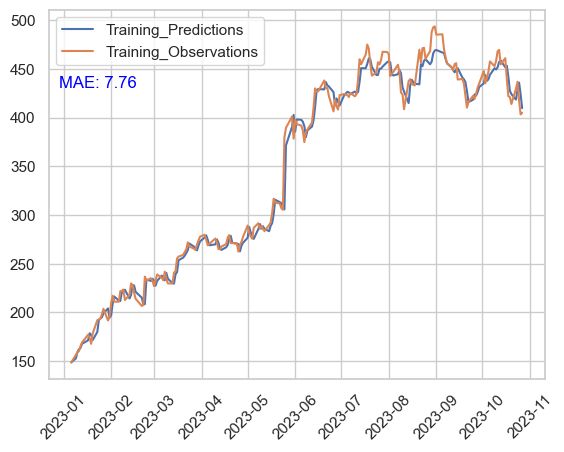

In [35]:
# You can plot the models predictions against the observations
# For the training data
train_predictions = model.predict(X_train).flatten()

mae = sum(abs(train_predictions-Y_train))/len(train_predictions)

plt.plot(dates_train, train_predictions)
plt.plot(dates_train, Y_train)
plt.legend(['Training_Predictions','Training_Observations'])
plt.text(0.02, 0.79, f'MAE: {mae:.2f}', transform=plt.gca().transAxes, color='blue', fontsize=12)


plt.xticks(rotation=45)

- The trained model closely fits the actual data, as expected
- The MAE is 7.76, meaning the average difference between the actual and predicted stock price is $7.76
- This seems very reasonable

*Now to look at the validation dataset*

1/1 [==============================] - 0s 26ms/step


(array([19659., 19662., 19666., 19670., 19674., 19678., 19682., 19686.,
        19690., 19692., 19696.]),
 [Text(19659.0, 0, '2023-10-29'),
  Text(19662.0, 0, '2023-11-01'),
  Text(19666.0, 0, '2023-11-05'),
  Text(19670.0, 0, '2023-11-09'),
  Text(19674.0, 0, '2023-11-13'),
  Text(19678.0, 0, '2023-11-17'),
  Text(19682.0, 0, '2023-11-21'),
  Text(19686.0, 0, '2023-11-25'),
  Text(19690.0, 0, '2023-11-29'),
  Text(19692.0, 0, '2023-12-01'),
  Text(19696.0, 0, '2023-12-05')])

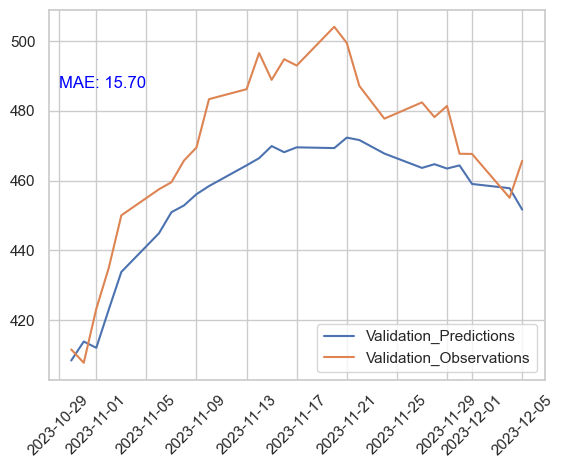

In [36]:
# For the validation data
val_predictions = model.predict(X_val).flatten()

mae = sum(abs(val_predictions-Y_val))/len(val_predictions)

plt.plot(dates_val, val_predictions)
plt.plot(dates_val, Y_val)
plt.legend(['Validation_Predictions','Validation_Observations'])
plt.text(0.02, 0.79, f'MAE: {mae:.2f}', transform=plt.gca().transAxes, color='blue', fontsize=12)
plt.xticks(rotation=45)

- The performance of the model isn't bad
- The model is able to accurately predict the shape of this curve fairly well
- The MAE has doubled now, but it still seems to be reasonable

1/1 [==============================] - 0s 26ms/step


(array([19696., 19700., 19704., 19708., 19712., 19716., 19720., 19723.,
        19727., 19731., 19735.]),
 [Text(19696.0, 0, '2023-12-05'),
  Text(19700.0, 0, '2023-12-09'),
  Text(19704.0, 0, '2023-12-13'),
  Text(19708.0, 0, '2023-12-17'),
  Text(19712.0, 0, '2023-12-21'),
  Text(19716.0, 0, '2023-12-25'),
  Text(19720.0, 0, '2023-12-29'),
  Text(19723.0, 0, '2024-01-01'),
  Text(19727.0, 0, '2024-01-05'),
  Text(19731.0, 0, '2024-01-09'),
  Text(19735.0, 0, '2024-01-13')])

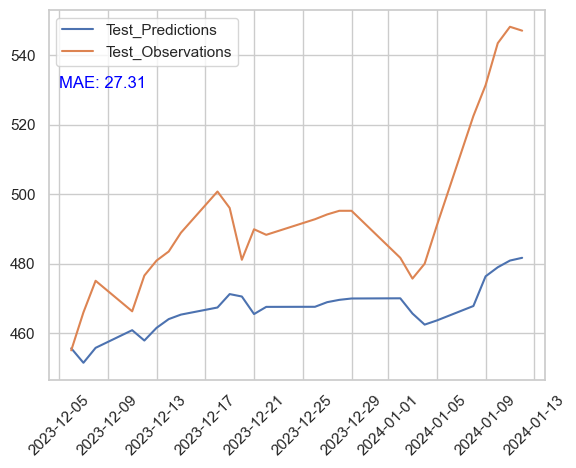

In [37]:
# For the test data
test_predictions = model.predict(X_test).flatten()

mae = sum(abs(test_predictions-Y_test))/len(test_predictions)

plt.plot(dates_test, test_predictions)
plt.plot(dates_test, Y_test)
plt.legend(['Test_Predictions','Test_Observations'])
plt.text(0.02, 0.79, f'MAE: {mae:.2f}', transform=plt.gca().transAxes, color='blue', fontsize=12)
plt.xticks(rotation=45)

- Again the MAE has increased, but only being out by $27.31 on average is good!

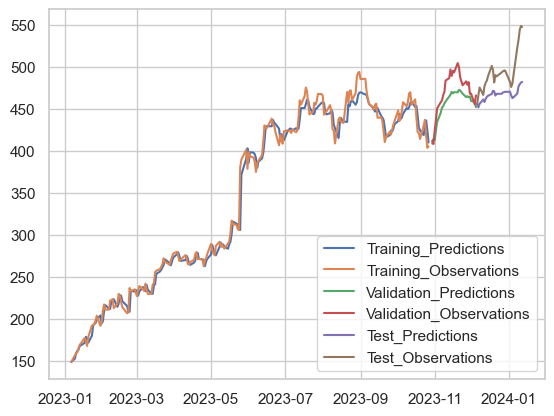

In [38]:
# Lets plot everything together 
plt.plot(dates_train, train_predictions)
plt.plot(dates_train, Y_train)
plt.plot(dates_val, val_predictions)
plt.plot(dates_val, Y_val)
plt.plot(dates_test, test_predictions)
plt.plot(dates_test, Y_test)
plt.legend(['Training_Predictions','Training_Observations', 
            'Validation_Predictions','Validation_Observations',
            'Test_Predictions','Test_Observations'])

**Making predictions!**
- here I am using the predict function of the lstm model to predict stock prices based on the training data alone
- this is taking the last entry of the training data - the three days of prices at this date (because the window is 3)
- then based on these prices it's predicting the next price
- the window of three prices is updated with this newly predicted price
- this process repeats itself for the whole period

In [39]:
from copy import deepcopy

recursive_predictions = []
recursive_dates = np.concatenate([dates_val, dates_test])
last_window = deepcopy(X_train[-1])

for target_date in recursive_dates:
    next_prediction = model.predict(np.array([last_window])).flatten()
    recursive_predictions.append(next_prediction)
    last_window = np.vstack([last_window[1:], [next_prediction]])

1/1 [==============================] - 0s 32ms/step


- I now compare the predicted prices vs the validation and test data

Text(0.02, 0.79, 'MAE: 47.39')

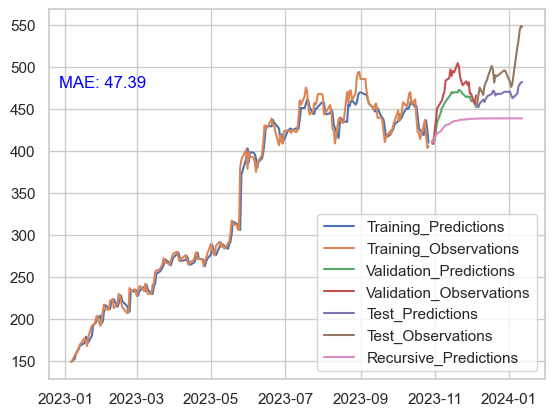

In [40]:
# Lets plot everything together 
plt.plot(dates_train, train_predictions)
plt.plot(dates_train, Y_train)
plt.plot(dates_val, val_predictions)
plt.plot(dates_val, Y_val)
plt.plot(dates_test, test_predictions)
plt.plot(dates_test, Y_test)
plt.plot(recursive_dates, recursive_predictions)

#MAE
Y_val_test = np.concatenate([Y_val, Y_test])

mae_store = []

for obs, pred in zip(Y_val_test, recursive_predictions):
    value = abs(obs - pred)
    mae_store.append(value)
    
mae = sum(mae_store)/len(mae_store)


plt.legend(['Training_Predictions','Training_Observations', 
            'Validation_Predictions','Validation_Observations',
            'Test_Predictions','Test_Observations', 
           'Recursive_Predictions'])

plt.text(0.02, 0.79, f'MAE: {mae[0]:.2f}', transform=plt.gca().transAxes, color='blue', fontsize=12)

In [41]:
mae_of_price = (mae/Y_val_test.mean())*100
mae_of_price

array([9.842799], dtype=float32)

- the Mean Absolute Error when comparing the models predictions and the evaluation & test data is worse still
- on average, predictions are wrong by $47.39, this is the mae
- but is this is large or small value? well it is 9.8% of the stocks actual price over the eval/test period
- so there is a significant difference, but realistically this is not dramatically wrong
- the model is able to predict a fairly reasonable price
- here we can see that the model seems to understand that the stock price is in a dip and that it will soon increase
- over a longer period is assumes this price will stabilise, which is unlikely

**I am going to increase the size of the training data, by including eval data in training data and observe performance**

Text(0, 0.5, 'Close Price ($)')

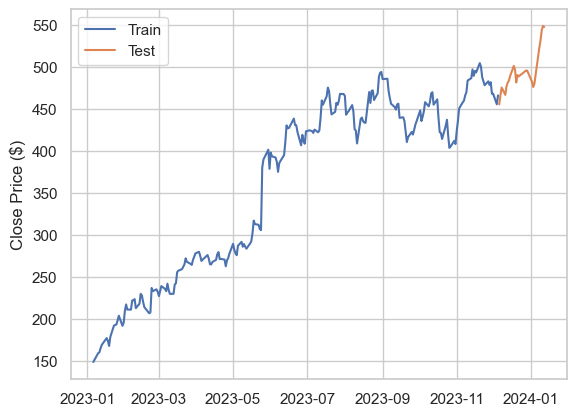

In [42]:
# PLOT
q_90 = int(len(dates) *.9)

#Train
dates_train2, X_train2, Y_train2 = dates[:q_90], X[:q_90], Y[:q_90]

#Test
dates_test2, X_test2, Y_test2 = dates[q_90:], X[q_90:], Y[q_90:]

# Plot
plt.plot(dates_train2, Y_train2)
plt.plot(dates_test2, Y_test2)
plt.legend(['Train', 'Test'])
plt.ylabel('Close Price ($)')

In [43]:
# BUILD THE MODEL

model2 = Sequential([layers.Input((3,1)), # there are three layers to out input data, because the window has three layers
                   layers.LSTM(64), # number of nuerons in the neural network - this is a good level to prevent overfitting 
                   layers.Dense(32, activation='relu'), # this creates another layer in the NN
                   layers.Dense(32, activation='relu'), # do another
                   layers.Dense(1) # final layer
                   ])

model2.compile(loss='mse', # loss means we are trying to minimise the mean squared error
              optimizer=Adam(learning_rate=0.001), # try this learning rate
              metrics = ['mean_absolute_error'] # this allows us to see on average how off the model is
                                                # it makes more sense to interpret this, even if minimising the mean squared error
             )


model2.fit(X_train2, Y_train2, validation_data=(X_test2, Y_test2), epochs=100 ) # runs for 100 times on the training data

train_predictions2 = model2.predict(X_train2).flatten()

# PREDICT
recursive_predictions2 = []
recursive_dates2 = dates_test2
last_window2 = deepcopy(X_train2[-1])

for target_date2 in recursive_dates2:
    next_prediction2 = model2.predict(np.array([last_window2])).flatten()
    recursive_predictions2.append(next_prediction2)
    last_window2 = np.vstack([last_window2[1:], [next_prediction2]])

Epoch 1/100
8/8 [==============================] - 4s 126ms/step - loss: 140266.6719 - mean_absolute_error: 359.8035 - val_loss: 244353.0000 - val_mean_absolute_error: 493.7201
Epoch 2/100
8/8 [==============================] - 0s 9ms/step - loss: 139922.0781 - mean_absolute_error: 359.3220 - val_loss: 244005.3125 - val_mean_absolute_error: 493.3678
Epoch 3/100
8/8 [==============================] - 0s 8ms/step - loss: 139632.5781 - mean_absolute_error: 358.9083 - val_loss: 243498.9062 - val_mean_absolute_error: 492.8542
Epoch 4/100
8/8 [==============================] - 0s 9ms/step - loss: 139151.0000 - mean_absolute_error: 358.2478 - val_loss: 242688.9688 - val_mean_absolute_error: 492.0321
Epoch 5/100
8/8 [==============================] - 0s 9ms/step - loss: 138638.9531 - mean_absolute_error: 357.5265 - val_loss: 242045.0000 - val_mean_absolute_error: 491.3772
Epoch 6/100
8/8 [==============================] - 0s 9ms/step - loss: 138118.8125 - mean_absolute_error: 356.8037 - val_lo

8/8 [==============================] - 0s 9ms/step - loss: 238.5214 - mean_absolute_error: 11.5055 - val_loss: 1755.9698 - val_mean_absolute_error: 35.9537
Epoch 49/100
8/8 [==============================] - 0s 8ms/step - loss: 251.1030 - mean_absolute_error: 11.9061 - val_loss: 1553.5039 - val_mean_absolute_error: 32.8255
Epoch 50/100
8/8 [==============================] - 0s 20ms/step - loss: 260.0065 - mean_absolute_error: 11.9157 - val_loss: 1649.1655 - val_mean_absolute_error: 34.7135
Epoch 51/100
8/8 [==============================] - 0s 21ms/step - loss: 206.0936 - mean_absolute_error: 10.8767 - val_loss: 1725.2000 - val_mean_absolute_error: 36.2964
Epoch 52/100
8/8 [==============================] - 0s 17ms/step - loss: 194.3564 - mean_absolute_error: 10.1161 - val_loss: 1675.1244 - val_mean_absolute_error: 35.6755
Epoch 53/100
8/8 [==============================] - 0s 20ms/step - loss: 184.4754 - mean_absolute_error: 9.9122 - val_loss: 1448.1584 - val_mean_absolute_error: 31.9

Epoch 97/100
8/8 [==============================] - 0s 10ms/step - loss: 131.0711 - mean_absolute_error: 8.2320 - val_loss: 592.4180 - val_mean_absolute_error: 17.6214
Epoch 98/100
8/8 [==============================] - 0s 11ms/step - loss: 133.8071 - mean_absolute_error: 8.3155 - val_loss: 548.4625 - val_mean_absolute_error: 16.4842
Epoch 99/100
8/8 [==============================] - 0s 12ms/step - loss: 140.7338 - mean_absolute_error: 8.8610 - val_loss: 652.6022 - val_mean_absolute_error: 19.5120
Epoch 100/100
1/1 [==============================] - 0s 30ms/step


In [44]:
# Save the model:
#from tensorflow.keras.models import load_model
#model2.save("my_model2")

from tensorflow.keras.models import load_model
import tensorflow as tf

# Load the model back
model2 = load_model("my_model2")

# Suppress the deprecation warning
tf.compat.v1.logging.set_verbosity(tf.compat.v1.logging.ERROR)

Text(0.02, 0.65, 'MAE: 25.88')

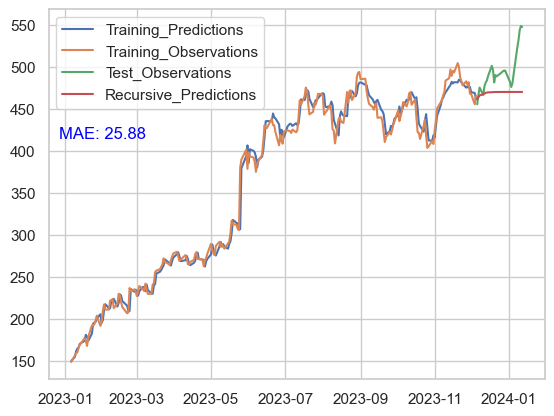

In [45]:
plt.plot(dates_train2, train_predictions2)
plt.plot(dates_train2, Y_train2)
plt.plot(dates_test2, Y_test2)
plt.plot(recursive_dates2, recursive_predictions2)

mae_store2 = []

for obs2, pred2 in zip(Y_test2, recursive_predictions2):
    value2 = abs(obs2 - pred2)
    mae_store2.append(value2)
    
mae2 = sum(mae_store2)/len(mae_store2)


plt.legend(['Training_Predictions','Training_Observations', 
            'Test_Observations', 
           'Recursive_Predictions'])

plt.text(0.02, 0.65, f'MAE: {mae2[0]:.2f}', transform=plt.gca().transAxes, color='blue', fontsize=12)

- When increasing the size of training data from 80% to 90%, the performance of the model worsens 
- the mae is now $64.82
- so the model performance seems to be pretty poor 

**I'm curious to visualise the MAE's for these models in the short term**

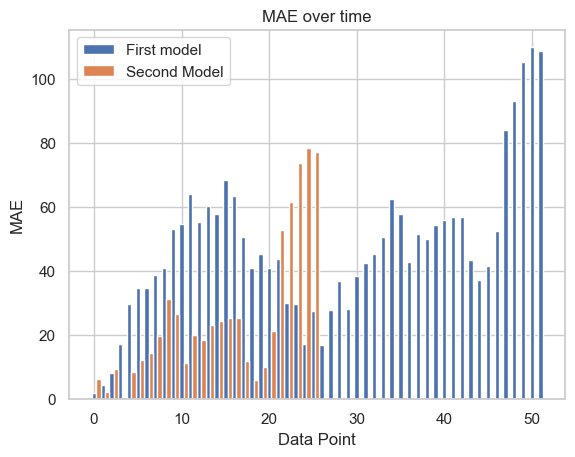

In [52]:
mae_values = [mae[0] for mae in mae_store]
mae_values2 = [mae[0] for mae in mae_store2]

# Plot the first set of values
plt.bar(np.arange(len(mae_values)), mae_values, width=bar_width, label='First model')

# Plot the second set of values
plt.bar(np.arange(len(mae_values2)) + bar_width, mae_values2, width=bar_width, label='Second Model')

plt.xlabel('Data Point')
# Uncomment the line below if you want to set custom labels for x-axis
# plt.xticks(np.arange(len(mae_values)) + bar_width/2, ['Date1', 'Date2', 'Date3', 'Date4', 'Date5'], rotation=45)
plt.ylabel('MAE')
plt.title('MAE over time')

plt.legend()  # Add a legend to distinguish between sets

plt.show()

- What is notable is that the MAE generally increases over time 
- there is a dip in MAE, but this is caused by the true values for Y dipping and so getting closer to the flat line of the predicted values
- so the model actually performs quite well at predicting the next days close price
- as you extrapolate further the model performs worse and worse
- but this makes sense

# 8. Rolling Model

- what I want to do now is build a rolling model
- I will train the model on a period of data
- then predict the next days close price
- the model will then move by a date and try and predict the next day
- I will evaluate how well the model is able to do this

In [58]:
from tensorflow.keras.models import Sequential
from tensorflow.keras import layers
from tensorflow.keras.optimizers import Adam
from tqdm import tqdm
import numpy as np
import pandas as pd
from copy import deepcopy
from datetime import datetime, timedelta

In [63]:
# Variables
number_of_data_points = 365 # want a years worth of data in training data
q= 0.8 #proportion of data you want to train model on 
# Decide which stock to analyse
data_set = NVDA
start_date='2022-12-31'
end_date='2024-01-15'
epochs = 10



# Load the raw data
df = cut_raw_data(start_date=start_date, end_date=end_date)

stocks = df['Stock'].unique()

for stock in stocks:
    globals()[f"{stock}"] = df[df['Stock'] == stock].drop('Stock',axis=1)
    

# Make a windowed dataframe - window decides how many days of data are used to predict the next one 
df_windowed = create_window_df(data_set['Close'], window=3)

# Make into a numpy data frame 
dates, X, Y = windowed_to_numpy(df_windowed)

prediction_date = []
observation_store = []
prediction_store =[]

dates_10 = dates
X_10 = X
Y_10 = Y

progress_bar = tqdm(total=len(dates_10), desc="Training Progress")

for start_date in dates_10:
    end_date = start_date + pd.DateOffset(days=number_of_data_points - 1)
    
    
    if end_date >= max(dates_10):
        continue
       
    
    # Cut data for this period
    mask = (dates_10 >= start_date) & (dates_10 <= end_date)
    date_range = dates_10[mask]
    X_temp = X_10[mask]
    Y_temp = Y_10[mask]   
    
    # Split into training and test data
    q_cut = int(len(date_range) * q)

    #Train
    dates_train, X_train, Y_train = date_range[:q_cut], X_temp[:q_cut], Y_temp[:q_cut]

    #Test
    dates_test, X_test, Y_test = date_range[q_cut:], X_temp[q_cut:], Y_temp[q_cut:]



    model_s = Sequential([layers.Input((3,1)), # there are three layers to out input data, because the window has three layers
                   layers.LSTM(64), # number of nuerons in the neural network - this is a good level to prevent overfitting 
                   layers.Dense(32, activation='relu'), # this creates another layer in the NN
                   layers.Dense(32, activation='relu'), # do another
                   layers.Dense(1) # final layer
                   ])

    model_s.compile(loss='mse', # loss means we are trying to minimise the mean squared error
                  optimizer=Adam(learning_rate=0.001), # try this learning rate
                  metrics = ['mean_absolute_error'] # this allows us to see on average how off the model is
                                                    # it makes more sense to interpret this, even if minimising the mean squared error
                 )


    model_s.fit(X_train, Y_train, validation_data=(X_test, Y_test), epochs=epochs ) # runs for 100 times on the training data


    # Predict the next value
    #next_date = dates_test[0] # get the first date in the test data
    #last_window_s = deepcopy(X_train[-1]) # find the last window of dates from training data
    #next_prediction_s = model_s.predict(np.array([last_window_s])).flatten() # predict the dates value 
    
    # By doing above the prediction is always in the past 
    # this needs to take all train/test data and predict beyond this 
    # the larger the dataset used, the better this should be?
    next_date = dates_test[-1] + timedelta(days=1)
    last_window_s = deepcopy(X_test[-1])
    next_prediction_s = model_s.predict(np.array([last_window_s])).flatten()

    # Store values
    prediction_date.append(next_date) # this is the date we are predicting
    observation_store.append(last_window_s[-1]) # this is the prediction the model makes
    prediction_store.append(next_prediction_s) # this is the observed price

# Close the tqdm progress bar
progress_bar.close()
    
    


Training Progress:   0%|                                                                       | 0/759 [00:44<?, ?it/s]


Epoch 1/10
7/7 [==============================] - 8s 308ms/step - loss: 129174.2188 - mean_absolute_error: 344.4885 - val_loss: 221923.8281 - val_mean_absolute_error: 470.3374
Epoch 2/10
7/7 [==============================] - 0s 18ms/step - loss: 128868.5625 - mean_absolute_error: 344.0409 - val_loss: 221558.4688 - val_mean_absolute_error: 469.9489
Epoch 3/10
7/7 [==============================] - 0s 21ms/step - loss: 128600.4062 - mean_absolute_error: 343.6527 - val_loss: 221176.6875 - val_mean_absolute_error: 469.5424
Epoch 4/10
7/7 [==============================] - 0s 16ms/step - loss: 128266.9766 - mean_absolute_error: 343.1623 - val_loss: 220568.8281 - val_mean_absolute_error: 468.8944
Epoch 5/10
7/7 [==============================] - 0s 19ms/step - loss: 127717.0469 - mean_absolute_error: 342.3506 - val_loss: 219649.4531 - val_mean_absolute_error: 467.9133
Epoch 6/10
7/7 [==============================] - 0s 19ms/step - loss: 127053.6719 - mean_absolute_error: 341.3908 - val_los

7/7 [==============================] - 0s 23ms/step - loss: 130762.1094 - mean_absolute_error: 347.6917 - val_loss: 228965.5625 - val_mean_absolute_error: 477.7589
Epoch 7/10
7/7 [==============================] - 0s 33ms/step - loss: 130321.1719 - mean_absolute_error: 347.0585 - val_loss: 228265.2969 - val_mean_absolute_error: 477.0253
Epoch 8/10
7/7 [==============================] - 0s 26ms/step - loss: 129691.2031 - mean_absolute_error: 346.1223 - val_loss: 227043.3906 - val_mean_absolute_error: 475.7423
Epoch 9/10
7/7 [==============================] - 0s 24ms/step - loss: 128612.3516 - mean_absolute_error: 344.5804 - val_loss: 225382.7812 - val_mean_absolute_error: 473.9930
Epoch 10/10
1/1 [==============================] - 1s 1s/step


Training Progress:   0%|                                                                       | 0/256 [00:57<?, ?it/s]


In [71]:
prediction_date

[Timestamp('2024-01-06 00:00:00'),
 Timestamp('2024-01-09 00:00:00'),
 Timestamp('2024-01-10 00:00:00'),
 Timestamp('2024-01-11 00:00:00'),
 Timestamp('2024-01-12 00:00:00')]

In [72]:
observation_store

[array([479.98], dtype=float32),
 array([490.97], dtype=float32),
 array([522.53], dtype=float32),
 array([531.4], dtype=float32),
 array([543.5], dtype=float32)]

In [73]:
prediction_store

[array([12.379508], dtype=float32),
 array([37.973076], dtype=float32),
 array([15.358025], dtype=float32),
 array([24.508558], dtype=float32),
 array([9.018666], dtype=float32)]

In [70]:
last_window_s

array([[522.53],
       [531.4 ],
       [543.5 ]], dtype=float32)

In [74]:
next_prediction_s

array([9.018666], dtype=float32)

- my attempt at building a rollin model has also not been possible
- the issue I am facing here is that there is a training period, then a validation period when training the model
- the predicted value sits outside both of these date ranges
- meaning that there is a significant gap between the last date of the training data and the prediction date
- this explains why the predictability of the mode is so weak
- in conclusion, this model and technique has not been effective in predicting future stock prices